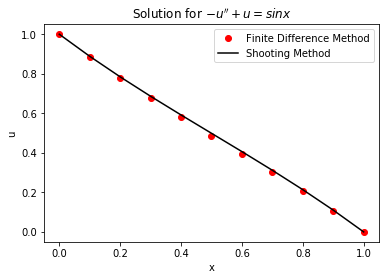

In [65]:
#CA1 1


import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=10
ii=0
ff=1
h=(ff-ii)/n

xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=0
g0=1
g1=0

def pf(x):
    return 0
def qf(x):
    return 2
def ff(x):
    return x
def AD(x):
    return 2+qf(x)*h**2
def ATD(x):
    return -(1-(1/2)*pf(x)*h)
def ABD(x):
    return -(1+(1/2)*pf(x)*h)
def BT(x):
    return (1+(1/2)*pf(x)*h)*g0+(h**2)*ff(x)
def BM(x):
    return (h**2)*ff(x)
def BB(x):
    return (1-(1/2)*pf(x)*h)*g1+(h**2)*ff(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []

for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i == n-1:
        MatB.append(BB(xx))
    else:
        MatB.append(BM(xx))
    xx=xy



dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()

U = solve(MatA,MatB)
X=np.arange(xi,xj,h)
plt.plot(xo,g0, "ro")
plt.plot(xj,g1,"ro")
plt.plot(X,U, "ro", label = "Finite Difference Method")


x=0.0
y1=1.0
y2=0.0
y3=0.0
y4=1.0
a=0.0
b=1.0

beta=0
y1i=[y1]
y3i=[y3]
xi=[x]

def ps(x):
    return 0
def qs(x):
    return 1
def fs(x):
    return -(np.sin(x))

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return ps(x)*y2+qs(x)*y1+fs(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return ps(x)*y4+qs(x)*y3

for i in range(n):
    K11= f1(x,y1,y2)
    K12= f2(x,y1,y2)
    
    K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
    K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
    K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
    K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
    K41= f1(x+h,y1+h*K31,y2+h*K32)
    K42= f2(x+h,y1+h*K31,y2+h*K32)
    
    y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
    y1=y11
    
    y22=y2+h*(K12+2*K22+2*K32+K42)/6
    y2=y22
    
    K13= f3(x,y3,y4)
    K14= f4(x,y3,y4)
    
    K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
    K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
    K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
    K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
    K43= f3(x+h,y3+h*K33,y4+h*K34)
    K44= f4(x+h,y3+h*K33,y4+h*K34)
    
    y33=y3+h*(K13+2*K23+2*K33+K43)/6
    y3=y33
    
    y44=y4+h*(K14+2*K24+2*K34+K44)/6
    y4=y44
    
    y1i.append(y1)
    y3i.append(y3)

    x=x+h
    xi.append(x)

U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    

plt.plot(xi,U,'-k', label = "Shooting Method")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solution for ${-u'' + u = sin x}$")
plt.legend()
plt.show()






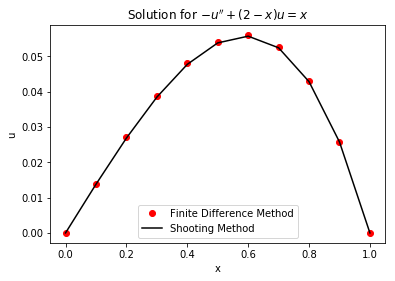

In [66]:
#CA1 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=10
ii=0
ff=1
h=(ff-ii)/n

xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=x0+h
g0=0
g1=0

def pf(x):
    return 0
def qf(x):
    return 2-x
def ff(x):
    return x
def AD(x):
    return 2+qf(x)*h**2
def ATD(x):
    return -(1-(1/2)*pf(x)*h)
def ABD(x):
    return -(1+(1/2)*pf(x)*h)
def BT(x):
    return (1+(1/2)*pf(x)*h)*g0+(h**2)*ff(x)
def BM(x):
    return (h**2)*ff(x)
def BB(x):
    return (1-(1/2)*pf(x)*h)*g1+(h**2)*ff(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []


for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i == n-1:
        MatB.append(BB(xx))
    else:
        MatB.append(BM(xx))
    xx=xy



dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()

UBVP = solve(MatA,MatB)
X=np.arange(xi,xj,h)
plt.plot(xo,g0, "ro")
plt.plot(xj,g1,"ro")
plt.plot(X,UBVP, "ro", label="Finite Difference Method")


x=0.0
y1=0.0
y2=0.0
y3=0.0
y4=1.0
a=0.0
b=1.0

beta=0

y1i=[y1]
y3i=[y3]
xi=[x]

def ps(x):
    return 0
def qs(x):
    return 2-x
def fs(x):
    return -x

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return ps(x)*y2+qs(x)*y1+fs(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return ps(x)*y4+qs(x)*y3

for i in range(n):
    K11= f1(x,y1,y2)
    K12= f2(x,y1,y2)
    
    K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
    K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
    K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
    K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
    K41= f1(x+h,y1+h*K31,y2+h*K32)
    K42= f2(x+h,y1+h*K31,y2+h*K32)
    
    y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
    y1=y11
    
    y22=y2+h*(K12+2*K22+2*K32+K42)/6
    y2=y22
    
    K13= f3(x,y3,y4)
    K14= f4(x,y3,y4)
    
    K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
    K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
    K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
    K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
    K43= f3(x+h,y3+h*K33,y4+h*K34)
    K44= f4(x+h,y3+h*K33,y4+h*K34)
    
    y33=y3+h*(K13+2*K23+2*K33+K43)/6
    y3=y33
    
    y44=y4+h*(K14+2*K24+2*K34+K44)/6
    y4=y44
    
    y1i.append(y1)
    y3i.append(y3)

    x=x+h
    xi.append(x)

U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    

plt.plot(xi,U,'-k', label="Shooting Method")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solution for ${-u'' + (2-x)u = x}$")
plt.legend()
plt.show()





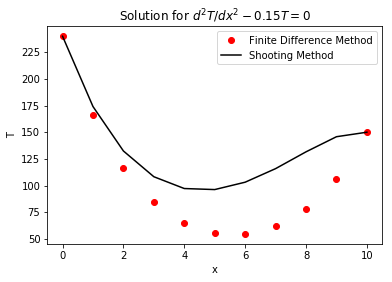

In [70]:
#CA 6

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=10
h=10/n
xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=x0+h
g0=240
g1=150

def pf(x):
    return 0
def qf(x):
    return 0.15
def ff(x):
    return 0
def AD(x):
    return 2+qf(x)*h**2
def ATD(x):
    return -(1-(1/2)*pf(x)*h)
def ABD(x):
    return -(1+(1/2)*pf(x)*h)
def BT(x):
    return (1+(1/2)*pf(x)*h)*g0+(h**2)*ff(x)
def BM(x):
    return (h**2)*ff(x)
def BB(x):
    return (1-(1/2)*pf(x)*h)*g1+(h**2)*ff(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []

for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i == n-1:
        MatB.append(BB(xx))
    else:
        MatB.append(BM(xx))
    xx=xy

dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()
U = solve(MatA,MatB)
X=np.arange(xi,xj,h)
plt.plot(xo,g0, "ro")
plt.plot(xj,g1,"ro")

plt.plot(X,U, "ro", label = "Finite Difference Method")


x=0.0
y1=240.0
y2=0.0
y3=0.0
y4=1.0
a=0.0
b=10.0

beta=150
y1i=[y1]
y3i=[y3]
xi=[x]
def ps(x):
    return 0
def qs(x):
    return 0.15
def fs(x):
    return 0
def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return ps(x)*y2+qs(x)*y1+fs(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return ps(x)*y4+qs(x)*y3

for i in range(n):
    K11= f1(x,y1,y2)
    K12= f2(x,y1,y2)
    
    K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
    K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
    K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
    K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
    K41= f1(x+h,y1+h*K31,y2+h*K32)
    K42= f2(x+h,y1+h*K31,y2+h*K32)
    
    y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
    y1=y11
    
    y22=y2+h*(K12+2*K22+2*K32+K42)/6
    y2=y22
    
    K13= f3(x,y3,y4)
    K14= f4(x,y3,y4)
    
    K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
    K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
    K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
    K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
    K43= f3(x+h,y3+h*K33,y4+h*K34)
    K44= f4(x+h,y3+h*K33,y4+h*K34)
    
    y33=y3+h*(K13+2*K23+2*K33+K43)/6
    y3=y33
    
    y44=y4+h*(K14+2*K24+2*K34+K44)/6
    y4=y44
    
    y1i.append(y1)
    y3i.append(y3)

    x=x+h
    xi.append(x)

U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
plt.plot(xi,U,'-k',label="Shooting Method")
plt.xlabel("x")
plt.ylabel("T")
plt.title("Solution for ${d^2T/dx^2 - 0.15T=0}$")
plt.legend()

plt.show()






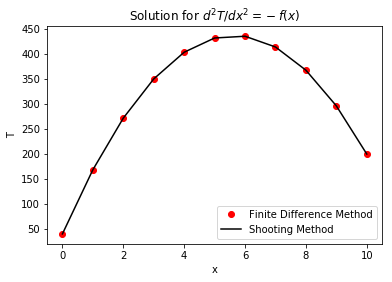

In [50]:
#CA 1 6

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=10
ii=0
ff=10
h=(ff-ii)/n

xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=0
g0=40
g1=200

def pf(x):
    return 0
def qf(x):
    return 0
def ff(x):
    return 25
def AD(x):
    return 2+qf(x)*h**2
def ATD(x):
    return -(1-(1/2)*pf(x)*h)
def ABD(x):
    return -(1+(1/2)*pf(x)*h)
def BT(x):
    return (1+(1/2)*pf(x)*h)*g0+(h**2)*ff(x)
def BM(x):
    return (h**2)*ff(x)
def BB(x):
    return (1-(1/2)*pf(x)*h)*g1+(h**2)*ff(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []

for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i == n-1:
        MatB.append(BB(xx))
    else:
        MatB.append(BM(xx))
    xx=xy



dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()

U = solve(MatA,MatB)
X=np.arange(xi,xj,h)
plt.plot(xo,g0, "ro")
plt.plot(xj,g1,"ro")
plt.plot(X,U, "ro", label ="Finite Difference Method")


x=0.0
y1=40.0
y2=0.0
y3=0.0
y4=200.0
a=0.0
b=10.0

beta=200
y1i=[y1]
y3i=[y3]
xi=[x]

def ps(x):
    return 0
def qs(x):
    return 0
def fs(x):
    return -25

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return ps(x)*y2+qs(x)*y1+fs(x)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return ps(x)*y4+qs(x)*y3

for i in range(n):
    K11= f1(x,y1,y2)
    K12= f2(x,y1,y2)
    
    K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
    K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
    K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
    K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
    K41= f1(x+h,y1+h*K31,y2+h*K32)
    K42= f2(x+h,y1+h*K31,y2+h*K32)
    
    y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
    y1=y11
    
    y22=y2+h*(K12+2*K22+2*K32+K42)/6
    y2=y22
    
    K13= f3(x,y3,y4)
    K14= f4(x,y3,y4)
    
    K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
    K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
    K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
    K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
    K43= f3(x+h,y3+h*K33,y4+h*K34)
    K44= f4(x+h,y3+h*K33,y4+h*K34)
    
    y33=y3+h*(K13+2*K23+2*K33+K43)/6
    y3=y33
    
    y44=y4+h*(K14+2*K24+2*K34+K44)/6
    y4=y44
    
    y1i.append(y1)
    y3i.append(y3)

    x=x+h
    xi.append(x)

U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    

plt.plot(xi,U,'-k', label = "Shooting Method")
plt.xlabel("x")
plt.ylabel("T")
plt.title("Solution for ${d^2T/dx^2 = -f(x)}$")
plt.legend()
plt.show()






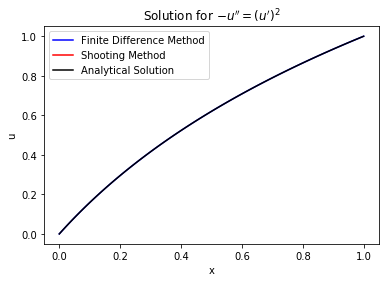

In [91]:
#CA1 8 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

a=0
b=1
n=100
ua=0
ub=1

h=(b-a)/(n+1)

X = np.linspace(a, b, n)

def Upp(x,u,up):
    return -up**2

def FDM(u):
    
    Sol = np.zeros(u.shape)
    
    Sol[0] = u[0]-ua
    for i in range(1,n-1):
        x = X[i]
        Sol[i] = (1/(h**2))*(u[i+1]-2*u[i]+u[i-1])-Upp(x,u[i],(1/(2*h))*(u[i+1]-u[i-1]))
        
    Sol[-1] = u[-1]-ub
    return Sol


u0 = ua + X*((ub-ua)/(b-a))
UNBVP = fsolve(FDM,u0)

plt.plot(X, UNBVP, '-b', label = "Finite Difference Method")


x=0
x0=0.0
x1=1.0
u0=0.0
u1=1.0
beta=1

h=(x1-x0)/n



s0 = (u1-u0)/(x1-x0)
ds = 0.001
s1 = s0+ds
tol = 1.0e-5


#concept same as linear
#no p,q,f directly insert eqn

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return -y2*y2

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return -y4*y4

xn=np.arange(x0,x1+h,h)


for i in range(n):

    y1=0.0
    y2=s0
    y3=0.0
    y4=s1
    y1i=[y1]
    y3i=[y3]


    
    for i in range(n):
        K11= f1(x,y1,y2)
        K12= f2(x,y1,y2)
    
        K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
        K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
        K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
        K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
        K41= f1(x+h,y1+h*K31,y2+h*K32)
        K42= f2(x+h,y1+h*K31,y2+h*K32)
    
        y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
        y1=y11
    
        y22=y2+h*(K12+2*K22+2*K32+K42)/6
        y2=y22
    
        K13= f3(x,y3,y4)
        K14= f4(x,y3,y4)
    
        K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
        K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
        K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
        K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
        K43= f3(x+h,y3+h*K33,y4+h*K34)
        K44= f4(x+h,y3+h*K33,y4+h*K34)
    
        y33=y3+h*(K13+2*K23+2*K33+K43)/6
        y3=y33
    
        y44=y4+h*(K14+2*K24+2*K34+K44)/6
        y4=y44
    
        y1i.append(y1)
        y3i.append(y3)

        x0=x0+h
    
        
    del1 = y11 - 1
    del3 = y33 - 1
        
    d = abs(del1-del3)
        
    if d > tol:
        s2 = s1 - del3*(s1-s0)/d
        s0=s1
        s1=s2 
U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    
xi=np.arange(x,x1+h,h)
plt.plot(xi,U,'-r', label = "Shooting Method")

xtrue = np.arange(a,b+h,h)
ytrue = np.log((np.exp(1)-1)*xtrue+1)
    
plt.plot(xtrue,ytrue,'-k',label = "Analytical Solution")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solution for ${-u''=(u')^2}$")
plt.legend()
plt.show()

      




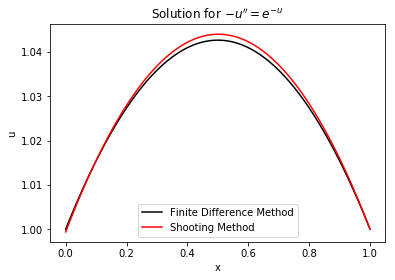

In [87]:
#CA1 9
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

a=0
b=1
n=100
ua=1
ub=1

h=(b-a)/(n+1)

X = np.linspace(a, b, n)

def Upp(x,u,up):
    return -np.exp(-u)

def FDM(u):
    
    Sol = np.zeros(u.shape)
    
    Sol[0] = u[0]-ua
    for i in range(1,n-1):
        x = X[i]
        Sol[i] = (1/(h**2))*(u[i+1]-2*u[i]+u[i-1])-Upp(x,u[i],(1/(2*h))*(u[i+1]-u[i-1]))
        
    Sol[-1] = u[-1]-ub
    return Sol


u0 = ua + X*((ub-ua)/(b-a))
UNBVP = fsolve(FDM,u0)

plt.plot(X, UNBVP, '-k', label = "Finite Difference Method")


x=0
x0=0.0
x1=1.0
u0=1.0
u1=1.0
beta=1

h=(x1-x0)/n



s0 = (u1-u0)/(x1-x0)
ds = 0.01
s1 = s0+ds
tol = 1.0e-5


#concept same as linear
#no p,q,f directly insert eqn

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return -np.exp(-y1)

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return -np.exp(-y3)

xn=np.arange(x0,x1+h,h)


for i in range(n):

    y1=1.0
    y2=s0
    y3=1.0
    y4=s1
    y1i=[y1]
    y3i=[y3]


    
    for i in range(n):
        K11= f1(x,y1,y2)
        K12= f2(x,y1,y2)
    
        K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
        K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
        K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
        K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
        K41= f1(x+h,y1+h*K31,y2+h*K32)
        K42= f2(x+h,y1+h*K31,y2+h*K32)
    
        y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
        y1=y11
    
        y22=y2+h*(K12+2*K22+2*K32+K42)/6
        y2=y22
    
        K13= f3(x,y3,y4)
        K14= f4(x,y3,y4)
    
        K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
        K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
        K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
        K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
        K43= f3(x+h,y3+h*K33,y4+h*K34)
        K44= f4(x+h,y3+h*K33,y4+h*K34)
    
        y33=y3+h*(K13+2*K23+2*K33+K43)/6
        y3=y33
    
        y44=y4+h*(K14+2*K24+2*K34+K44)/6
        y4=y44
    
        y1i.append(y1)
        y3i.append(y3)

        x0=x0+h
    
        
    del1 = y11 - 1
    del3 = y33 - 1
        
    d = abs(del1-del3)
        
    if d > tol:
        s2 = s1 - del3*(s1-s0)/d
        s0=s1
        s1=s2 
U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    
xi=np.arange(x,x1+h,h)
plt.plot(xi,U,'-r', label = "Shooting Method")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solution for ${-u''= e^{-u}}$")

plt.legend()
plt.show()

      




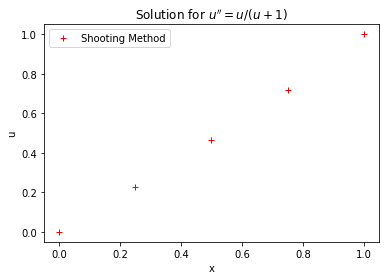

In [21]:
#CA1 10
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

n=4
x=0
x0=0.0
x1=1.0
u0=0.0
u1=1.0
beta=1

h=(x1-x0)/(n)



s0 = (u1-u0)/(x1-x0)
ds = 0.01
s1 = s0+ds
tol = 1.0e-6


#concept same as linear
#no p,q,f directly insert eqn

def f1(x,y1,y2):
    return y2

def f2(x,y1,y2):
    return (y1/(y1+1))

def f3(x,y3,y4):
    return y4

def f4(x,y3,y4):
    return (y3/(y3+1))


for i in range(n):

    y1=0.0
    y2=s0
    y3=0.0
    y4=s1
    y1i=[y1]
    y3i=[y3]


    
    for i in range(n):
        K11= f1(x,y1,y2)
        K12= f2(x,y1,y2)
    
        K21= f1(x+h/2,y1+h+K11/2,y2+h*K12/2)
        K22= f2(x+h/2,y1+h*K11/2,y2+h*K12/2)
    
        K31= f1(x+h/2,y1+h*K21/2,y2+h*K22/2)
        K32= f2(x+h/2,y1+h*K21/2,y2+h*K22/2)
    
        K41= f1(x+h,y1+h*K31,y2+h*K32)
        K42= f2(x+h,y1+h*K31,y2+h*K32)
    
        y11=y1+h*(K11+2*K21+2*K31+K41)/6
    
        y1=y11
    
        y22=y2+h*(K12+2*K22+2*K32+K42)/6
        y2=y22
    
        K13= f3(x,y3,y4)
        K14= f4(x,y3,y4)
    
        K23= f3(x+h/2,y3+h*K13/2,y4+h*K14)
        K24= f4(x+h/2,y3+h*K13/2,y4+h*K14)
    
        K33= f3(x+h/2,y3+h*K23/2,y4+h*K24/2)
        K34= f4(x+h/2,y3+h*K23/2,y4+h*K24/2)
    
        K43= f3(x+h,y3+h*K33,y4+h*K34)
        K44= f4(x+h,y3+h*K33,y4+h*K34)
    
        y33=y3+h*(K13+2*K23+2*K33+K43)/6
        y3=y33
    
        y44=y4+h*(K14+2*K24+2*K34+K44)/6
        y4=y44
    
        y1i.append(y1)
        y3i.append(y3)

        x0=x0+h
    
        
    del1 = y11 - 1
    del3 = y33 - 1
        
    d = abs(del1-del3)
        
    if d > tol:
        s2 = s1 - del3*(s1-s0)/d
        s0=s1
        s1=s2 
U=[]

for i in range(n+1):
    yx=y1i[i]+(beta-y1i[-1])*(y3i[i])/(y3i[-1])
    U.append(yx)
    
xi=np.arange(x,x1+h,h)
plt.plot(xi,U,'+r', label = "Shooting Method")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Solution for ${u''= u/(u+1)}$")
plt.legend()
plt.show()

      




[1.98364713e-25 3.21577917e-01 6.52888985e-01 1.00000000e+00]


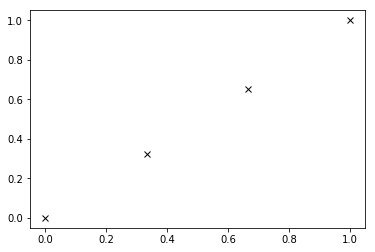

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

a=0
b=1
n=4
ua=0
ub=1

h=(b-a)/(n+1)

X = np.linspace(a, b, n)

def Upp(x,u,up):
    return ((u)/(u+1))

def FDM(u):
    
    Sol = np.zeros(u.shape)
    
    Sol[0] = u[0]-ua
    for i in range(1,n-1):
        x = X[i]
        Sol[i] = (1/(h**2))*(u[i+1]-2*u[i]+u[i-1])-Upp(x,u[i],(1/(2*h))*(u[i+1]-u[i-1]))
        
    Sol[-1] = u[-1]-ub
    return Sol


u0 = ua + X*((ub-ua)/(b-a))
UNBVP = fsolve(FDM,u0)
print(UNBVP)
plt.plot(X, UNBVP, 'xk', label = "Finite Difference Method")


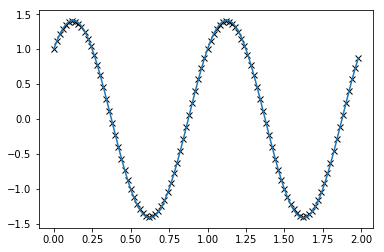

In [2]:
#Q14
#Numerov

import numpy as np
import matplotlib.pyplot as plt

# u''(x) = -4*((np.pi)**2)*u(x)
# u''(x) = -q(x)*u(x) + f(x)

n=100
h=0.02

u=np.zeros(n+1)
x=np.zeros(n+1)

x[0]=0
u[0]=1
u[1]=1.115 #suitable value for u1 is 1.115 idk why 


def q(x):
    return 4*(np.pi)**2

def f(x):
    return 0


for i in range(1,n):
    x[i] = x[0]+i*h
    #u[i+1] = ((2-(5*q(x)*h**2)/6)*u[i]-(1+(q(x)/12)*h**2)*u[i-1])/(1+q(x)*(1/12)*h**2)
    u[i+1] = ((2-(5*q(x[i])*h**2)/6)*u[i]-(1+(q(x[i-1])/12)*h**2)*u[i-1]+(f(x[i+1])+10*f(x[i])+f(x[i-1]))*(1/12)*h**2)/(1+q(x[i+1])*(1/12)*h**2)

    
U = u[:-1]
X = x[:-1]

plt.plot(X,U, "xk")

#analytical solution
xs = np.arange(0,2,h)
ys = np.sin(2*(np.pi)*xs)+np.cos(2*(np.pi)*xs)

plt.plot(xs,ys)

plt.show()

[ 4.95748671e+11 -4.95748671e+10  5.01546569e-02  9.53093137e-02
  1.49171879e-01  2.10183361e-01  2.77230192e-01  3.49458640e-01
  4.26183478e-01  5.06836729e-01  5.90936209e-01  6.78064944e-01
  7.67857002e-01  8.59987377e-01  9.54164518e-01  1.05012468e+00
  1.14762754e+00  1.24645275e+00  1.34639717e+00  1.44727265e+00
  1.54890414e+00  1.65112815e+00  1.75379152e+00  1.85675026e+00
  1.95986865e+00  2.06301842e+00  2.16607808e+00  2.26893226e+00
  2.37147126e+00  2.47359050e+00  2.57519015e+00  2.67617477e+00
  2.77645294e+00  2.87593700e+00  2.97454280e+00  3.07218941e+00
  3.16879895e+00  3.26429636e+00  3.35860927e+00  3.45166778e+00
  3.54340434e+00  3.63375363e+00  3.72265242e+00  3.81003941e+00
  3.89585522e+00  3.98004221e+00  4.06254441e+00  4.14330745e+00
  4.22227849e+00  4.29940611e+00  4.37464027e+00  4.44793223e+00
  4.51923451e+00  4.58850082e+00  4.65568602e+00  4.72074604e+00
  4.78363789e+00  4.84431956e+00  4.90275000e+00  4.95888911e+00
  5.01269764e+00  5.06413

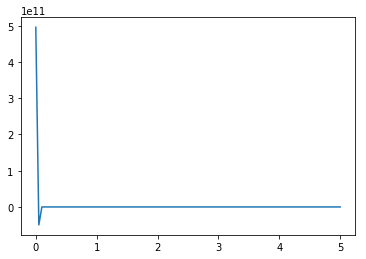

In [3]:
#Q15
#Sturm-Liouville incomplete

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root

n=100
h=1/10
l=1
ua=0
ub=1
a = 0
b = 1

def p(x):
    return x**2

def dp(x):
    return 2*x

def q(x):
    return -l*(l+1)

def f(x): 
    return -x**2

X = np.linspace(0, 5, n+1)


def BSF(u):
    
    Sol = np.zeros(n+1)
    
    for i in range(1,n-1):
        x = X[i]
        Sol[i] = (4*p(x)*u[i]) + (2*(h**2)*(f(x)-q(x)*u[i])) - ((2*p(x)-h*dp(x))*u[i-1]) - (2*p(x)+h*dp(x))*u[i+1]
        
    
    return Sol

u0 = ua + X*((ub-ua)/(b-a))
#print(X)
U = fsolve(BSF,u0)



print(U)
plt.plot(X,U)
plt.show()

In [3]:
#exam

import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve 
from scipy.sparse import diags

n=4
ii=0
ff=1
h=0.25

xo=0
xi=0+h
xj=xo+h*n
x0=0
xx=x0+h
g0=0
g1=2

def pf(x):
    return 0
def qf(x):
    return 2
def ff(x):
    return x
def AD(x):
    return 2+qf(x)*h**2
def ATD(x):
    return -(1-(1/2)*pf(x)*h)
def ABD(x):
    return -(1+(1/2)*pf(x)*h)
def BT(x):
    return (1+(1/2)*pf(x)*h)*g0+(h**2)*ff(x)
def BM(x):
    return (h**2)*ff(x)
def BB(x):
    return (1-(1/2)*pf(x)*h)*g1+(h**2)*ff(x)

dataAD  = []
dataATD = []
dataABD = []

MatB= []


for i in range(1,n):
    x=x0+h
    dataAD.append(AD(x))
    dataABD.append(ABD(x))
    dataATD.append(ATD(x))
    x0=x
    
for i in range(1,n):
    xy=xx+h
    
    if i == 1:
        MatB.append(BT(xx))
    elif i == n-1:
        MatB.append(BB(xx))
    else:
        MatB.append(BM(xx))
    xx=xy



dataA=np.array([dataAD,dataABD,dataATD])
MatA=diags(dataA, [0, -1, 1]).toarray()

UBVP = solve(MatA,MatB)
X=np.arange(xi,xj,h)
print(MatA)

[[ 2.125 -1.     0.   ]
 [-1.     2.125 -1.   ]
 [ 0.    -1.     2.125]]
